# 57. Scikit-learn library || Scikit-learn biblioteca

In [ ]:
import numpy as np, pandas as pd, pylab as pl
np.set_printoptions(precision=4)
pl.style.use('_mpl-gallery')

Artificial data || Datos artificiales

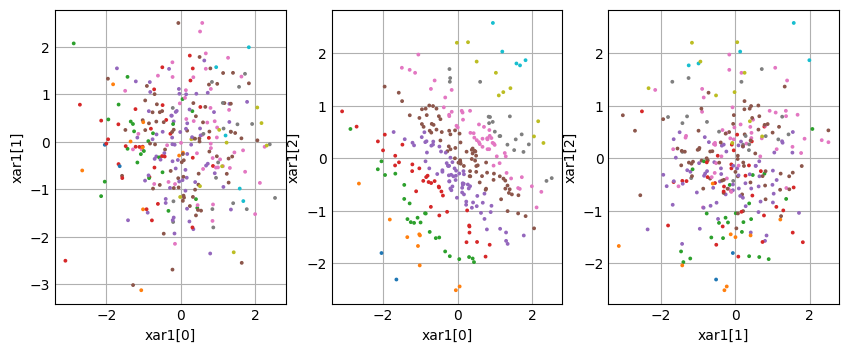

In [ ]:
from sklearn.datasets import make_regression
xar1, yar1 = make_regression(
    n_samples=25000, n_features=3, n_informative=2, n_targets=1, bias=.97)
f, ax = pl.subplots(ncols=3, figsize=(8, 3))
k = [[0, 1], [0, 2], [1, 2]]
for i in range(3):
    ax[i].scatter(xar1[:300, k[i][0]], xar1[:300, k[i][1]],
                  c=yar1[:300], s=3, cmap=pl.cm.tab10)
    ax[i].set_xlabel('xar1[%d]' % k[i][0])
    ax[i].set_ylabel('xar1[%d]' % k[i][1])
xar2, yar2 = make_regression(
    n_samples=5000, n_features=7, n_informative=6,
    n_targets=3, bias=.7, noise=10.)

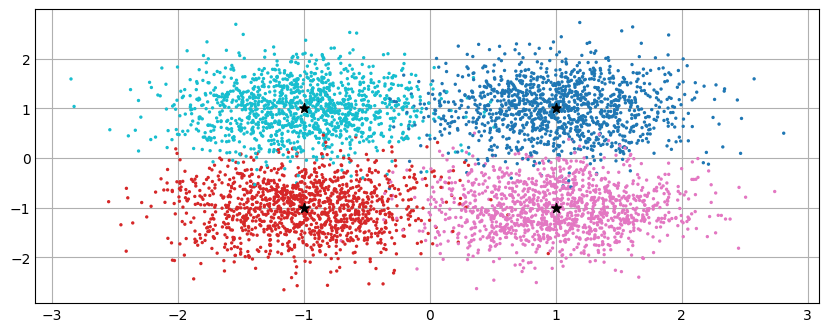

In [ ]:
from sklearn.datasets import make_blobs
xac, yac = make_blobs(
    n_samples=5000, cluster_std=.5,
    centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]])
pl.figure(figsize=(8, 3))
pl.scatter(xac[:, 0], xac[:, 1], c=yac, cmap=pl.cm.tab10, s=2)
pl.scatter([1, -1, 1, -1], [1, -1, -1, 1], c='black', marker='*', s=50);

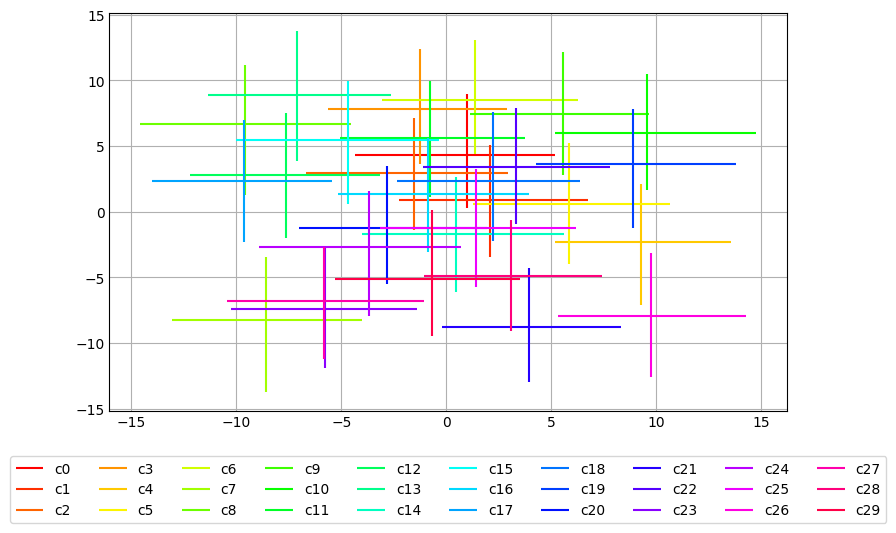

In [ ]:
# symbolic visualization - cluster centers and range of values
# visualización simbólica: centros de conglomerados y rango de valores
n_samples = 10**6; n_clusters = 30
xac2, yac2, c2 = make_blobs(
    n_samples=n_samples, n_features=2, centers=n_clusters, cluster_std=1.1,
    return_centers=True, shuffle=True, random_state=0)
pl.figure(figsize=(8, 6))
for i in range(n_clusters):
    color = pl.cm.hsv(i / n_clusters)
    pl.vlines(c2[i, 0], xac2[yac2==i, 1].min(),
              xac2[yac2==i, 1].max(), color=color)
    pl.hlines(c2[i, 1], xac2[yac2==i,0].min(),
              xac2[yac2==i, 0].max(), color=color, label='c%d'%i)
pl.legend(loc='lower center', bbox_to_anchor=[.5,-.3], ncol=n_clusters//3)
pl.tight_layout();

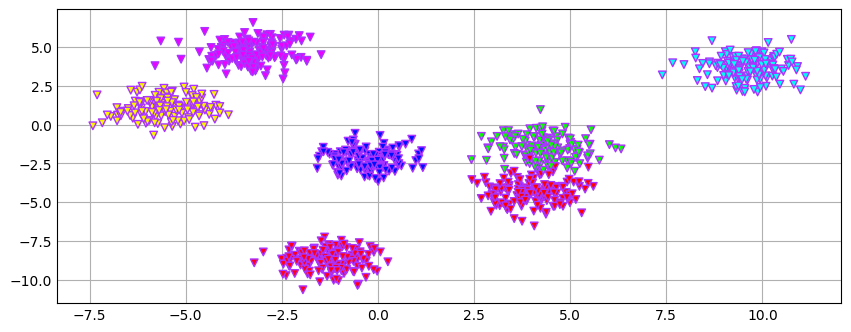

In [ ]:
n_samples = 10**3; n_clusters=7
xac3, yac3, c3 = make_blobs(
    n_samples=n_samples, n_features=2, centers=n_clusters,
    cluster_std=.7, return_centers=True, shuffle=True, random_state=123)
pl.figure(figsize=(8, 3))
pl.scatter(xac3[:, 0], xac3[:, 1], c=yac3, cmap=pl.cm.hsv,
           marker='v', edgecolor='#aa33ff', s=30);

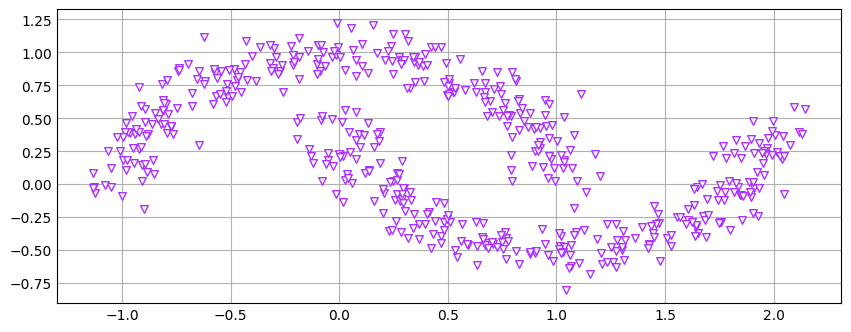

In [ ]:
from sklearn.datasets import make_moons
xac4, yac4 = make_moons(
    n_samples=500, noise=.1, random_state=0)
pl.figure(figsize=(8, 3))
pl.scatter(xac4[:,0], xac4[:,1], c='white', marker='v',
           edgecolor='#aa33ff', s=30);

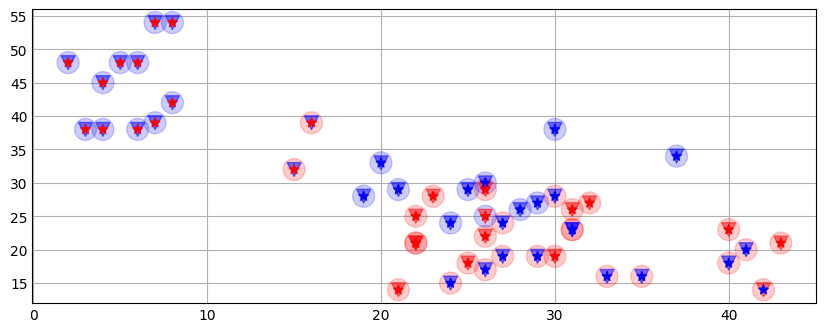

In [ ]:
from sklearn.datasets import make_multilabel_classification
xamc, yamc = make_multilabel_classification(
    n_classes=3, n_samples=25000, n_features=2)
f, ax = pl.subplots(1, figsize=(8,3))
m = ['o','v','*']; a = [.2, .5, 1]; s = [250, 100, 50]
for i in range(3):
    ax.scatter(xamc[:50, 0], xamc[:50, 1], c=yamc[:50, i], marker=m[i],
               alpha=a[i], cmap=pl.cm.bwr, s=s[i]);

Data for exercises || Datos para ejercicios

In [ ]:
import sklearn.datasets as sd
housing = sd.fetch_california_housing()
wine = sd.load_wine()
digits = sd.load_digits()
faces = sd.fetch_olivetti_faces()
news_train = sd.fetch_20newsgroups(
    subset='train', shuffle=True,
    remove=('headers', 'footers', 'quotes'))
news_test = sd.fetch_20newsgroups(
    subset='test', shuffle=True,
    remove=('headers', 'footers', 'quotes'))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


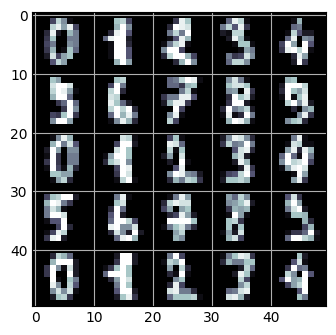

In [ ]:
n = 5; img = np.zeros((10*n,10*n))
for i in range(n):
    for j in range(n):
        img[(10*i+1):(10*i+9), (10*j+1):(10*j+9)] = \
        digits.data[i*n+j].reshape((8,8))
pl.figure(figsize=(3, 3))
pl.imshow(img,cmap=pl.cm.bone);

Data subsets for machine learning algorithms

Subconjuntos de datos para algoritmos de aprendizaje automático

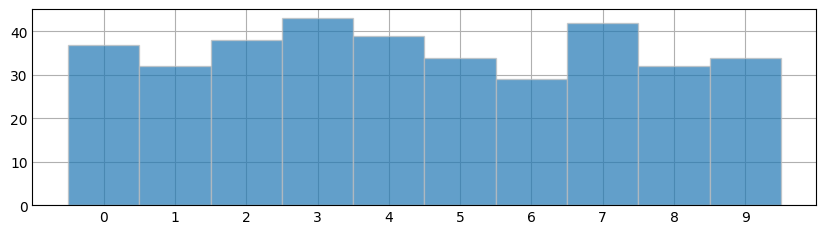

In [ ]:
from sklearn.model_selection import train_test_split
def tts(x, y, ts, rs=12):
    return train_test_split(x, y, test_size=ts, random_state=rs)
digits_train_x, digits_test_x, digits_train_y, digits_test_y = \
tts(digits.data, digits.target, .2)
pl.figure(figsize=(8, 2))
pl.hist(sorted(digits_test_y.astype(str)),
        bins=np.arange(11)-.5, edgecolor='silver', alpha=.7);

In [ ]:
for el in [digits_train_x, digits_test_x, digits_train_y, digits_test_y]:
    print(el.shape, end=' ')

(1437, 64) (360, 64) (1437,) (360,) 

In [ ]:
house_train_x, house_test_x, house_train_y, house_test_y = \
tts(housing.data, housing.target, .2)
for el in [house_train_x, house_test_x, house_train_y, house_test_y]:
    print(el.shape, end=' ')

(16512, 8) (4128, 8) (16512,) (4128,) 

In [ ]:
blob_train_x, blob_test_x, blob_train_y, blob_test_y = tts(xac, yac, .2)
for el in [blob_train_x, blob_test_x, blob_train_y, blob_test_y]:
    print(el.shape, end=' ')

(4000, 2) (1000, 2) (4000,) (1000,) 

Data extraction || Extracción de datos

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    sublinear_tf=True, max_df=.5, stop_words='english')
news_train_x = vectorizer.fit_transform(news_train.data)
news_test_x = vectorizer.transform(news_test.data)
news_train_y, news_test_y = news_train.target, news_test.target
for el in [news_train_x, news_test_x, news_train_y, news_test_y]:
    print(el.shape, end=' ')

(11314, 101322) (7532, 101322) (11314,) (7532,) 

Data transformations || Transformaciones de datos

In [ ]:
import sklearn.impute as si, sklearn.preprocessing as sp
x1_train = [[0,17], [np.nan,4], [1,7], [3,np.nan], [5,12], [10,25]]
x1_test = [[np.nan,5], [3,15], [8,np.nan], [4,11]]
mean_imp = si.SimpleImputer(strategy='mean')
median_imp = si.SimpleImputer(strategy='median')
log_trans = sp.FunctionTransformer(np.log1p, validate=False)
mean_imp.fit(x1_train)
median_imp.fit(x1_train)
x1_train_log = log_trans.transform(median_imp.transform(x1_train))
x1_test_log = log_trans.transform(median_imp.transform(x1_test))
for el in [x1_test, mean_imp.transform(x1_test),
           median_imp.transform(x1_test), x1_test_log]:
    print(el)

[[nan, 5], [3, 15], [8, nan], [4, 11]]
[[ 3.8  5. ]
 [ 3.  15. ]
 [ 8.  13. ]
 [ 4.  11. ]]
[[ 3.  5.]
 [ 3. 15.]
 [ 8. 12.]
 [ 4. 11.]]
[[1.3863 1.7918]
 [1.3863 2.7726]
 [2.1972 2.5649]
 [1.6094 2.4849]]


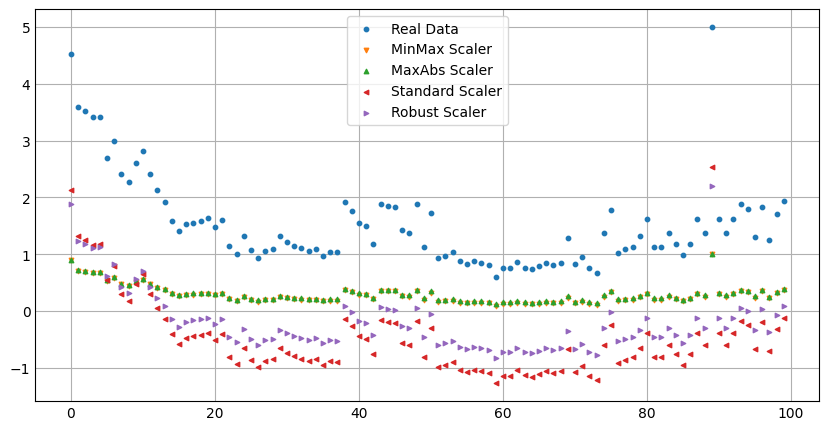

In [ ]:
import sklearn.preprocessing as sp
x, n = housing.target.reshape(-1, 1), 100
xscale = [x, sp.MinMaxScaler().fit_transform(x),
          sp.MaxAbsScaler().fit_transform(x),
          sp.StandardScaler().fit_transform(x),
          sp.RobustScaler().fit_transform(x)]
l = ['Real Data','MinMax Scaler','MaxAbs Scaler',
     'Standard Scaler','Robust Scaler']
m = ['o', 'v', '^', '<', '>']
pl.figure(figsize=(8, 4))
for i in range(len(xscale)):
    pl.scatter(range(n), xscale[i][:n],
               s=10, color=pl.cm.tab10(i/10), marker=m[i], label=l[i])
pl.legend();

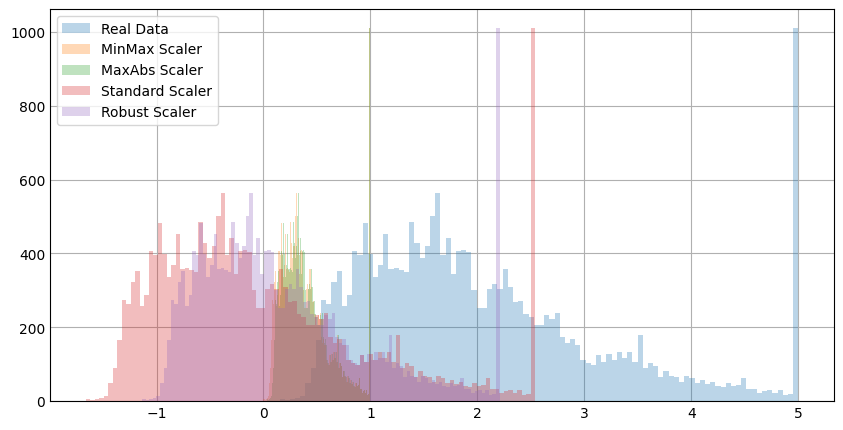

In [ ]:
# distribution changes / cambios de distribución
pl.figure(figsize=(8, 4))
for i in range(5):
    pl.hist(xscale[i], bins=100,
            color=pl.cm.tab10(i/10), alpha=.3, label=l[i])
pl.legend();

Feature selection || Selección de características

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
select_kbest = SelectKBest(score_func=f_regression, k=4)
fit_select_kbest = select_kbest.fit(housing.data, housing.target)
features_select_kbest = fit_select_kbest.transform(housing.data)
print("Kbest scores: \n", fit_select_kbest.scores_.astype('int'))
print(housing.feature_names)
print(np.array(housing.feature_names)[select_kbest.get_support()])
select_kbest = SelectKBest(score_func=chi2, k=5)
fit_select_kbest = select_kbest.fit(wine.data, wine.target)
features_select_kbest = fit_select_kbest.transform(wine.data)
print("Kbest scores: \n", fit_select_kbest.scores_.astype('int'))
print(np.array(wine.feature_names)[select_kbest.get_support()])

Kbest scores: 
 [18556   232   487    45    12    11   438    43]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedInc' 'HouseAge' 'AveRooms' 'Latitude']
Kbest scores: 
 [    5    28     0    29    45    15    63     1     9   109     5    23
 16540]
['alcalinity_of_ash' 'magnesium' 'flavanoids' 'color_intensity' 'proline']


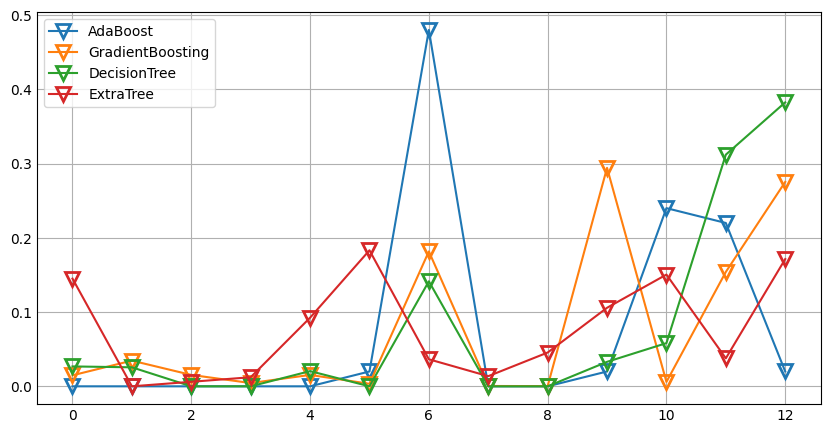

In [ ]:
# preliminary assessment of the significance of variables
# evaluación preliminar de la importancia de las variables
import sklearn.tree as st, sklearn.ensemble as se
classifiers = [se.AdaBoostClassifier, se.GradientBoostingClassifier,
               st.DecisionTreeClassifier, st.ExtraTreeClassifier]
labels = ['AdaBoost', 'GradientBoosting', 'DecisionTree', 'ExtraTree']
df = pd.DataFrame(columns=range(13))
pl.figure(figsize=(8, 4))
for i in range(4):
    df.loc[i] = classifiers[i]().fit(wine.data, wine.target).feature_importances_
    pl.plot(df.loc[i], '-v', label=labels[i], color=pl.cm.tab10(i/10),
            markersize=10, markerfacecolor="None", markeredgewidth=2)
pl.legend();

In [ ]:
# recursive feature elimination / eliminación de características recursiva
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
rfe = RFE(SVR(kernel="linear"), n_features_to_select=5, step=1)
fit_rfe = rfe.fit(wine.data, wine.target)
print("RFE selected features: \n", fit_rfe.support_)
print("feature ranking: \n",
      [el for el in enumerate(fit_rfe.ranking_) if el[1]==1])

RFE selected features: 
 [ True False False False False False  True  True False False  True  True
 False]
feature ranking: 
 [(0, 1), (6, 1), (7, 1), (10, 1), (11, 1)]


Dimensionality reduction || Reducción de dimensionalidad

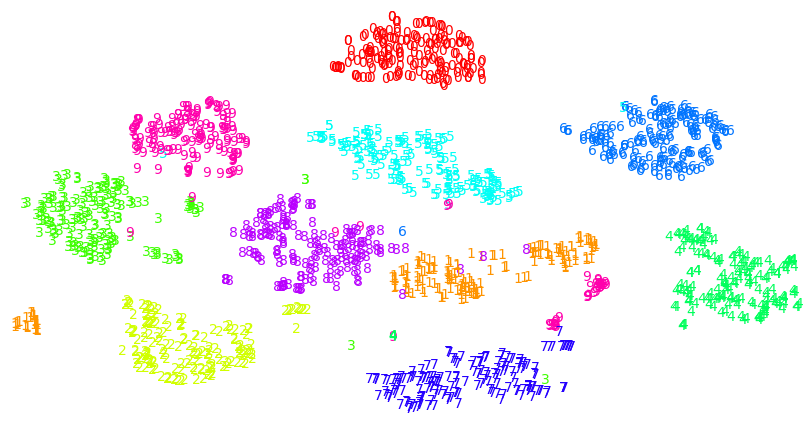

In [ ]:
from sklearn import manifold
digits_emb = manifold.TSNE(
    n_components=2, learning_rate=30.,
    n_iter=500, n_iter_without_progress=100,
    n_jobs=2,).fit_transform(digits.data)
digits_min, digits_max = np.min(digits_emb, 0), np.max(digits_emb, 0)
digits_emb = (digits_emb - digits_min) / (digits_max - digits_min)
f, ax = pl.subplots(1,figsize=(8, 4))
pl.axis("off")
for i in range(digits_emb.shape[0]):
    pl.text(
        digits_emb[i, 0], digits_emb[i, 1],
        str(digits.target[i]), color=pl.cm.hsv(digits.target[i]/10.))

Clusters and their quantity || Clústeres y su cantidad

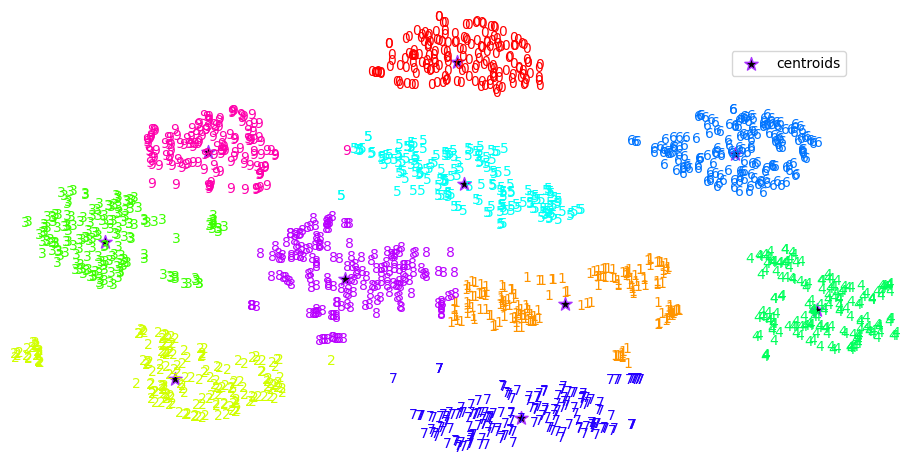

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, init='k-means++', n_init=10,
            max_iter=500, tol=1e-05, random_state=0)
digits_y_km = km.fit_predict(digits_emb)
labs = [np.median(digits.target[np.where([digits_y_km==i])[1]])
        for i in range(10)]
rd = dict(zip(list(range(10)), labs))
cl = np.array([rd.get(x, x) for x in digits_y_km], dtype='int8')
f, ax = pl.subplots(1, figsize=(8, 4))
pl.axis("off")
for i in range(10):
    for x, y in digits_emb[cl==i]:
        pl.text(x, y, str(i), color=pl.cm.hsv(i/10.))
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
           s=100, marker='*', c='black',
           edgecolor='#aa33ff', label='centroids')
pl.legend(scatterpoints=1);

In [ ]:
user = "https://raw.githubusercontent.com/OlgaBelitskaya/"
path = "machine_learning_engineer_nd009/master/Machine_Learning_Engineer_ND_P3/"
file_name = "customers.csv"
data = pd.read_csv(user + path + file_name)
data.drop(['Region','Channel'], axis=1, inplace=True)
log_data = np.log(data)
outliers  = [65, 66, 75, 128, 154]
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop=True)
good_data.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(good_data)
reduced_data = pca.transform(good_data)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for n in list(range(2, 12)):
    clusterer = KMeans(n_clusters=n, n_init='auto').fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    print ("n clusters = {} => silhouette_score = {}".format(n, score))

n clusters = 2 => silhouette_score = 0.4260721676842701
n clusters = 3 => silhouette_score = 0.3340090016121621
n clusters = 4 => silhouette_score = 0.3339741942725662
n clusters = 5 => silhouette_score = 0.31898579980770836
n clusters = 6 => silhouette_score = 0.36319811428165294
n clusters = 7 => silhouette_score = 0.32814028847456234
n clusters = 8 => silhouette_score = 0.3444865305902358
n clusters = 9 => silhouette_score = 0.33845565727382565
n clusters = 10 => silhouette_score = 0.35518647975921386
n clusters = 11 => silhouette_score = 0.3583253381878817


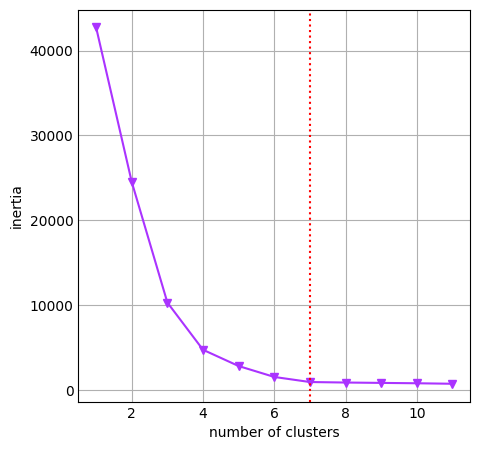

In [ ]:
from sklearn.cluster import KMeans
iner = []
for i in range(1,12):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10,
                max_iter=500, random_state=0)
    km.fit(xac3); iner.append(km.inertia_)
pl.figure(figsize=(4, 4))
pl.plot(range(1,12), iner, marker='v', c='#aa33ff')
pl.xlabel('number of clusters'); pl.ylabel('inertia')
pl.axvline(7, color='r', linestyle=':');

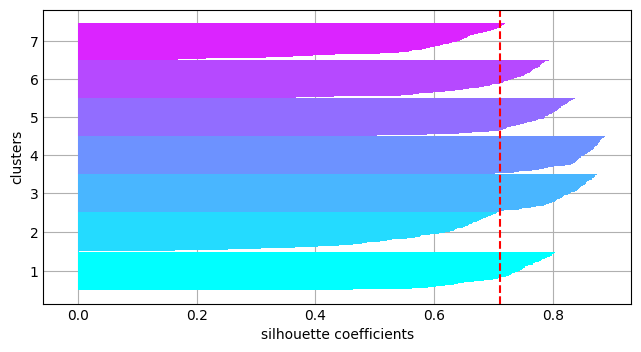

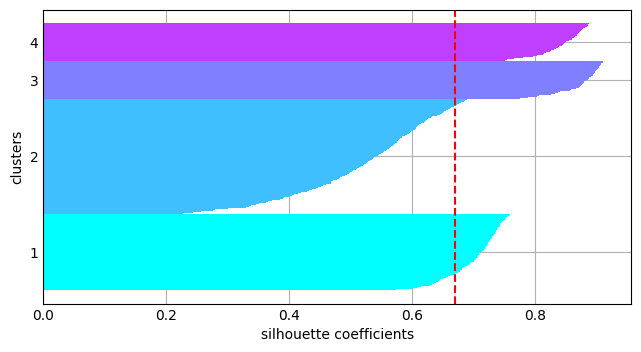

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
def kmeans_clusters(n_clusters, x=xac3):
    km = KMeans(n_clusters=n_clusters, init='k-means++',
                n_init=10, max_iter=500, tol=1e-04, random_state=0)
    return km, km.fit_predict(x)
def silhouette_plots(n_clusters, x=xac3):
    km, y_km = kmeans_clusters(n_clusters, x)
    labels = np.unique(y_km)
    svalues = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0; yticks=[]
    pl.figure(figsize=(6, 3))
    for i, c in enumerate(labels):
        c_svalues = svalues[y_km==c]; c_svalues.sort()
        y_ax_upper += len(c_svalues)
        color = pl.cm.cool(i / n_clusters)
        pl.barh(range(y_ax_lower, y_ax_upper), c_svalues,
                height=1., edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_svalues)
    savg = np.mean(svalues)
    pl.axvline(savg, color="red", linestyle="--")
    pl.yticks(yticks, labels+1)
    pl.ylabel('clusters')
    pl.xlabel('silhouette coefficients')
# well-fitted vs bad-fitted cluster amounts
silhouette_plots(7), silhouette_plots(4);

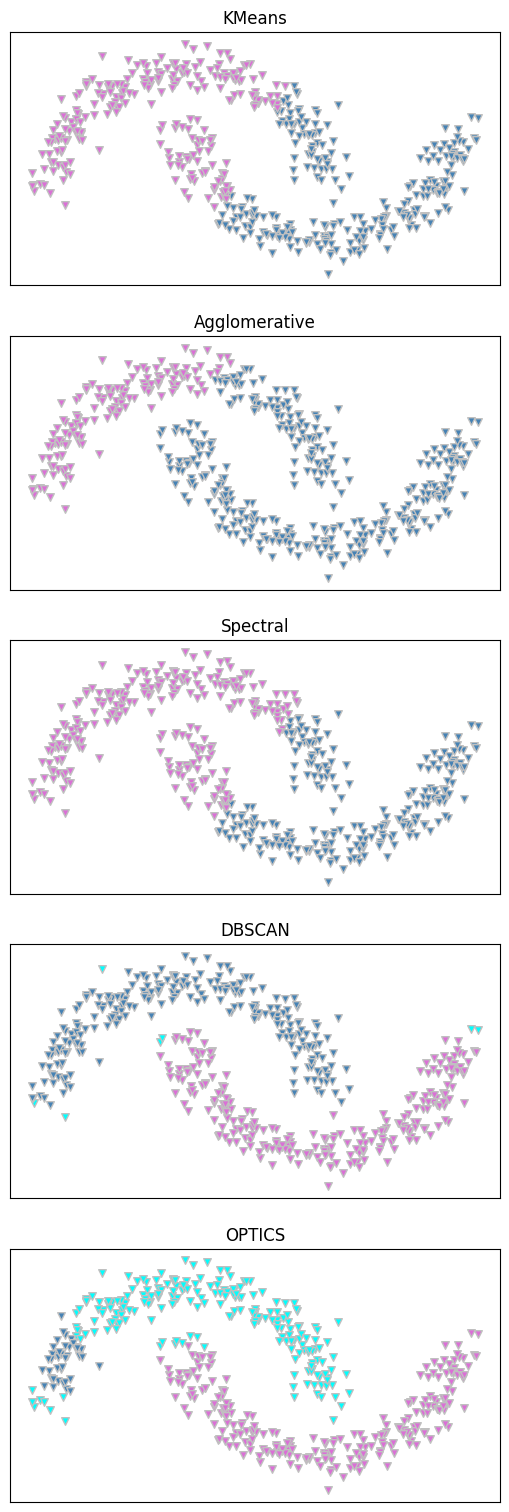

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.cluster import DBSCAN, OPTICS
n_clusters, n_init = 2, 30
cluster_dict = {
    'KMeans': KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0),
    'Agglomerative': AgglomerativeClustering(
        n_clusters=n_clusters, metric='euclidean', linkage='complete'),
    'Spectral': SpectralClustering(n_clusters=n_clusters, n_init=n_init),
    'DBSCAN': DBSCAN(eps=.2, min_samples=15, metric='euclidean'),
    'OPTICS': OPTICS(eps=.2, min_samples=30)}
colors = {-1: 'cyan', 0: 'steelblue', 1: 'orchid'}
f, ax = pl.subplots(5, 1, figsize=(5, 15))
count = 0
for key in cluster_dict.keys():
    yac4_predict = cluster_dict[key].fit_predict(xac4)
    for i in np.unique(yac4_predict):
        ax[count].scatter(xac4[yac4_predict==i, 0], xac4[yac4_predict==i, 1],
                          s=30, color=colors[i], marker='v', edgecolor='silver',
                          label=f'cluster {i}')
    ax[count].set_xticks([]); ax[count].set_yticks([])
    ax[count].set_title(key)
    count += 1

Hierarchical clustering || Agrupación jerárquica

In [ ]:
from sklearn.cluster import  AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
n = 9
subsets = {'a': 'cyan', 'b': 'steelblue', 'c': 'orchid'}
indices = [f'id{i+1}' for i in range(n)]
df = pd.DataFrame(np.random.random_sample([n, 3]),
                  columns=subsets.keys(), index=indices)
df_styled = df.style
for s, c in subsets.items():
    df_styled.bar(subset=[s], color=c)
ac = AgglomerativeClustering(
    n_clusters=3, metric='euclidean', linkage='complete')
ac_labels = ac.fit_predict(df)
print('cluster labels:\n', list(zip(indices, ac_labels)))
display(df_styled)

cluster labels:
 [('id1', 2), ('id2', 2), ('id3', 1), ('id4', 2), ('id5', 1), ('id6', 0), ('id7', 1), ('id8', 0), ('id9', 2)]


,a,b,c
id1,0.235691,0.637120,0.953722
id2,0.380349,0.824715,0.976596
id3,0.595016,0.182201,0.550739
id4,0.254571,0.828693,0.602440
id5,0.620332,0.186485,0.735181
id6,0.572640,0.720318,0.074216
id7,0.856671,0.672289,0.721411
id8,0.834158,0.081519,0.002246
id9,0.344132,0.751082,0.623668


,row label 1,row label 2,distance,n_items
cluster 1,3.0,8.0,0.120396,2.0
cluster 2,2.0,4.0,0.186221,2.0
cluster 3,0.0,1.0,0.237994,2.0
cluster 4,9.0,11.0,0.505035,4.0
cluster 5,6.0,10.0,0.639005,3.0
cluster 6,5.0,7.0,0.694000,2.0
cluster 7,13.0,14.0,0.981117,5.0
cluster 8,12.0,15.0,1.407766,9.0


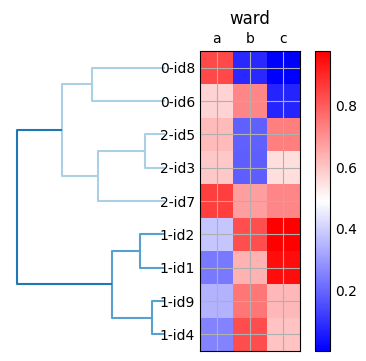

,row label 1,row label 2,distance,n_items
cluster 1,3.0,8.0,0.120396,2.0
cluster 2,2.0,4.0,0.186221,2.0
cluster 3,0.0,1.0,0.237994,2.0
cluster 4,9.0,11.0,0.400569,4.0
cluster 5,6.0,10.0,0.581187,3.0
cluster 6,5.0,7.0,0.694000,2.0
cluster 7,12.0,13.0,0.800163,7.0
cluster 8,14.0,15.0,1.306767,9.0


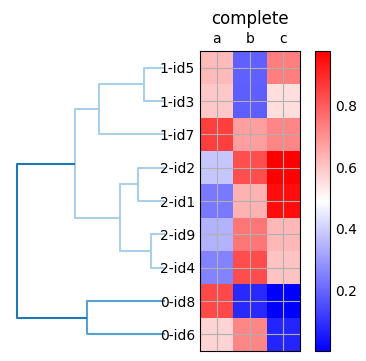

,row label 1,row label 2,distance,n_items
cluster 1,3.0,8.0,0.120396,2.0
cluster 2,2.0,4.0,0.186221,2.0
cluster 3,0.0,1.0,0.237994,2.0
cluster 4,9.0,11.0,0.380822,4.0
cluster 5,6.0,10.0,0.560802,3.0
cluster 6,12.0,13.0,0.666265,7.0
cluster 7,5.0,7.0,0.694000,2.0
cluster 8,14.0,15.0,0.885723,9.0


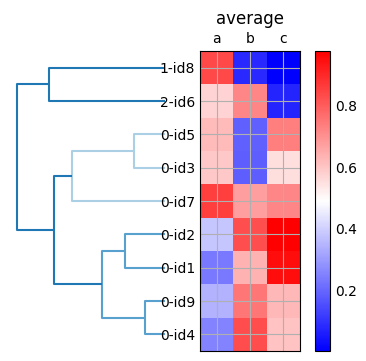

In [ ]:
def dist_clusters(df, linkage_method):
    dist_matrix = pdist(df, metric='euclidean')
    if linkage_method == 'ward':
        cluster_metric = 'euclidean'
        matrix = df
    elif linkage_method == 'average':
        cluster_metric = 'precomputed'
        # `squareform` is usually applied to convert
        # a condensed distance matrix into a square, symmetric distance matrix
        # `squareform` generalmente se aplica para convertir
        # una matriz de distancias condensada en
        # una matriz de distancias cuadrada y simétrica
        # matrix = squareform(...)
        matrix = squareform(dist_matrix)
    elif linkage_method == 'complete':
        cluster_metric = 'l2'
        matrix = df
    ac = AgglomerativeClustering(
        n_clusters=3, metric=cluster_metric, linkage=linkage_method)
    ac_labels = ac.fit_predict(matrix)
    row_clusters = linkage(
        dist_matrix, method=linkage_method, metric='euclidean')
    c = row_clusters.shape[0]
    rc = pd.DataFrame(
        row_clusters, index=[f'cluster {(i+1)}' for i in range(c)],
        columns=['row label 1', 'row label 2', 'distance', 'n_items'])
    display(rc)
    fig = pl.figure(figsize=(5, 5))
    axd = fig.add_axes([.1, .1, .31, .6])
    d = dendrogram(row_clusters, orientation='left', labels=df.index)
    df_cl = df.iloc[d['leaves'][::-1]]
    axd.set_xticks([]); axd.set_yticks([])
    for i in axd.spines.values(): i.set_visible(False)
    axm = fig.add_axes([.2, .1, .6, .6])
    cax = axm.matshow(df_cl, interpolation='nearest', cmap='bwr')
    fig.colorbar(cax)
    ac = [str(ac_labels[int(el[2])-1])+'-'+el for el in list(df_cl.index)]
    axm.set_xticks(axm.get_xticks()[1:-1])
    axm.set_yticks(axm.get_yticks()[1:-1])
    axm.set_xticklabels(list(df_cl.columns))
    axm.set_yticklabels(ac)
    pl.title(linkage_method); pl.show()
for el in ['ward', 'complete', 'average']:
    dist_clusters(df, el);

Classificators || Clasificadores

In [ ]:
from sklearn import svm
import sklearn.tree as st, sklearn.ensemble as se, sklearn.neighbors as sn
from sklearn.metrics import accuracy_score, classification_report
clf = [se.RandomForestClassifier(n_estimators=64),
       svm.SVC(gamma='scale',C=10.0,kernel='poly'),
       sn.KNeighborsClassifier()]
clf_names = ['RandomForestClassifier',
             'svm SVC Classifier',
             'KNeighborsClassifier']
clf_dict = {}
def classifier_fit_score(classifier, classifier_name,
                         x_train=digits_train_x, x_test=digits_test_x,
                         y_train=digits_train_y, y_test=digits_test_y):
    global clf_dict
    classifier.fit(x_train, y_train)
    y_clf_train = classifier.predict(x_train)
    y_clf_test = classifier.predict(x_test)
    acc_clf_train = round(accuracy_score(y_train, y_clf_train), 4)
    acc_clf_test = round(accuracy_score(y_test, y_clf_test), 4)
    clf_dict[classifier_name] = [y_clf_train, y_clf_test,
                                 acc_clf_train, acc_clf_test]
print('test accuracy_score()')
for i in range(3):
    classifier_fit_score(clf[i], clf_names[i])
    print(clf_names[i], '\t' , clf_dict[clf_names[i]][3])

test accuracy_score()
RandomForestClassifier 	 0.9722
svm SVC Classifier 	 0.9944
KNeighborsClassifier 	 0.975


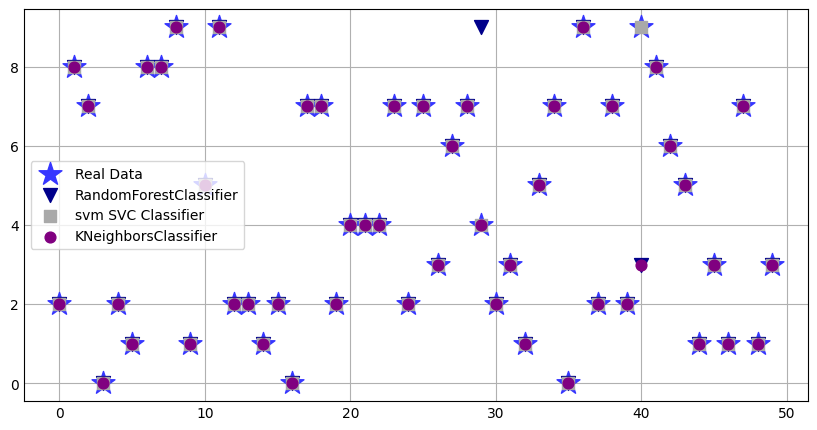

In [ ]:
pl.figure(figsize=(8, 4))
n = 50; x = range(n)
m = ["v", 's', 'o']
c = ['darkblue', 'darkgrey', 'purple']
s = [100, 80, 60]
pl.scatter(range(n), digits_test_y[:n],
           marker='*', s=300, color='#3636ff', label='Real Data')
for i in range(3):
    pl.scatter(x, clf_dict[clf_names[i]][1][:n],
               marker=m[i], s=s[i], color=c[i], label=clf_names[i])
pl.legend(loc=6);


In [ ]:
for i in range(3):
    print(clf_names[i])
    print(classification_report(
        digits_test_y, clf_dict[clf_names[i]][1]))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.97      1.00      0.98        32
           2       0.97      1.00      0.99        38
           3       0.98      1.00      0.99        43
           4       1.00      0.92      0.96        39
           5       1.00      0.91      0.95        34
           6       1.00      0.97      0.98        29
           7       0.98      1.00      0.99        42
           8       1.00      0.97      0.98        32
           9       0.86      0.94      0.90        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

svm SVC Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        32
           2       1.00      1.00   

Regressors || Regresores

In [ ]:
from sklearn.metrics import \
mean_squared_error, median_absolute_error, mean_absolute_error, \
r2_score, explained_variance_score
import sklearn.neural_network as snn
import sklearn.ensemble as se
reg = [se.RandomForestRegressor(),
       se.GradientBoostingRegressor(),
       snn.MLPRegressor(hidden_layer_sizes=(32,), max_iter=500, batch_size=128)]
reg_names = ['RandomForestRegressor',
             'GradientBoostingRegressor',
             'MLPRegressor']
reg_dict = {}
def regressor_fit_score(regressor, regressor_name,
                        x_train=house_train_x, x_test=house_test_x,
                        y_train=house_train_y, y_test=house_test_y):
    global reg_dict
    regressor.fit(x_train, y_train)
    y_reg_train = regressor.predict(x_train)
    y_reg_test = regressor.predict(x_test)
    r2_reg_train = round(r2_score(y_train, y_reg_train), 4)
    r2_reg_test = round(r2_score(y_test, y_reg_test), 4)
    ev_reg_train = round(explained_variance_score(y_train, y_reg_train), 4)
    ev_reg_test = round(explained_variance_score(y_test, y_reg_test), 4)
    mse_reg_train = round(mean_squared_error(y_train, y_reg_train), 4)
    mse_reg_test = round(mean_squared_error(y_test, y_reg_test), 4)
    mae_reg_train = round(mean_absolute_error(y_train, y_reg_train), 4)
    mae_reg_test = round(mean_absolute_error(y_test, y_reg_test), 4)
    mdae_reg_train = round(median_absolute_error(y_train, y_reg_train), 4)
    mdae_reg_test=round(median_absolute_error(y_test, y_reg_test), 4)
    reg_dict[regressor_name] = [
        y_reg_train, y_reg_test, r2_reg_train, r2_reg_test,
        ev_reg_train, ev_reg_test, mse_reg_train, mse_reg_test,
        mae_reg_train, mae_reg_test, mdae_reg_train, mdae_reg_test]

In [ ]:
for i in range(3):
    regressor_fit_score(reg[i], reg_names[i])
    print(reg_names[i], '\t' ,
          'r2', reg_dict[reg_names[i]][2], '\t' ,
          'explained_variance_score', reg_dict[reg_names[i]][3])

RandomForestRegressor 	 r2 0.9734 	 explained_variance_score 0.8175
GradientBoostingRegressor 	 r2 0.8028 	 explained_variance_score 0.7974
MLPRegressor 	 r2 0.5298 	 explained_variance_score 0.569


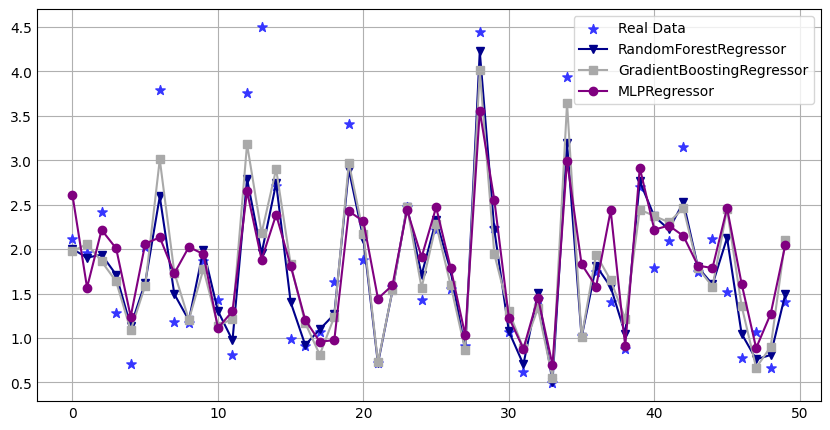

In [ ]:
pl.figure(figsize=(8, 4))
n = 50; x = range(n)
m = ["v", 's', 'o']
c = ['darkblue', 'darkgrey', 'purple']
s = [30, 20, 10]
pl.scatter(range(n), house_test_y[:n],
           marker='*', s=50, color='#3636ff', label='Real Data')
for i in range(3):
    pl.plot(x, reg_dict[reg_names[i]][1][:n],
               marker=m[i], color=c[i], label=reg_names[i])
pl.legend();

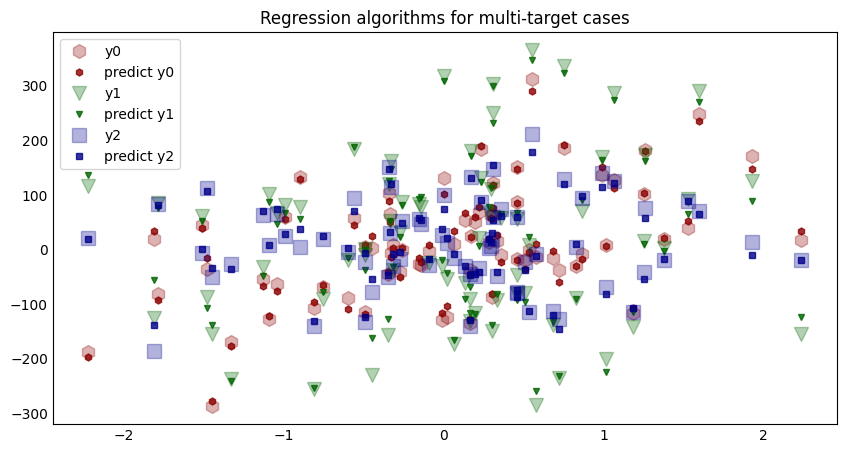

In [ ]:
import sklearn.multioutput as smo, sklearn.ensemble as se
pl.figure(figsize=(8, 4))
colors = ['darkred', 'darkgreen', 'darkblue']
markers = ['h','v','s']
n = 70
yar2_mor = smo.MultiOutputRegressor(
    se.GradientBoostingRegressor(
        random_state=0)).fit(xar2, yar2).predict(xar2)
for i in range(3):
    pl.plot(xar2[:n, 0], yar2[:n, i], lw=0, c=colors[i],
            ms=10, marker=markers[i], alpha=.3, label='y%d'%i)
    pl.plot(xar2[:n, 0], yar2_mor[:n, i], lw=0, c=colors[i],
            ms=5, marker=markers[i], alpha=.8, label='predict y%d'%i)
pl.grid(); pl.legend()
pl.title('Regression algorithms for multi-target cases');

Examples of unsupervised learning || Ejemplos de aprendizaje no supervisado

In [ ]:
from sklearn import mixture
mix = [mixture.GaussianMixture(n_components=4, n_init=4),
       mixture.BayesianGaussianMixture(n_components=4, n_init=4)]
mix[0].fit(blob_train_x)
blob_mix0_test_y = mix[0].predict(blob_test_x)
mix[1].fit(blob_train_x)
blob_mix1_test_y = mix[1].predict(blob_test_x)

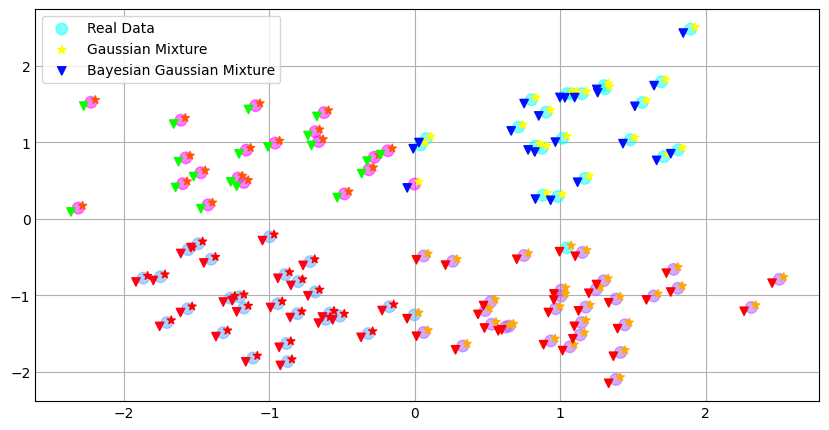

In [ ]:
pl.figure(figsize=(8, 4))
n = 100; x = range(n)
pl.scatter(blob_test_x[:n, 0], blob_test_x[:n, 1], s=70, alpha=.5,
           c=blob_test_y[:n], cmap=pl.cm.cool, label='Real Data')
pl.scatter(blob_test_x[:n, 0] + .03, blob_test_x[:n, 1] + .03, marker='*',
           c=blob_mix0_test_y[:n], cmap=pl.cm.autumn, label='Gaussian Mixture')
pl.scatter(blob_test_x[:n, 0] - .05, blob_test_x[:n, 1] - .05, marker='v',
           c=blob_mix1_test_y[:n], cmap=pl.cm.hsv, label='Bayesian Gaussian Mixture')
pl.legend();

Neural Networks || Redes neuronales







In [ ]:
# supervised
import sklearn.neural_network as snn
import warnings; warnings.filterwarnings('ignore')
nn_clf1 = snn.MLPClassifier(
    hidden_layer_sizes=(512,), max_iter=70, solver='sgd',
    verbose=0, random_state=12, learning_rate_init=.01)
nn_clf1.fit(digits_train_x, digits_train_y)
(nn_clf1.score(digits_train_x, digits_train_y),
 nn_clf1.score(digits_test_x, digits_test_y))

(1.0, 0.9805555555555555)

In [ ]:
nn_clf3 = snn.MLPClassifier(
    hidden_layer_sizes=(128,), max_iter=3, solver='adam',
    verbose=1, random_state=1, learning_rate_init=.01)
nn_clf3.fit(news_train_x, news_train_y)
print(nn_clf3.score(news_test_x, news_test_y))

Iteration 1, loss = 1.48157142
Iteration 2, loss = 0.19998997
Iteration 3, loss = 0.11511956
0.7107010090281466


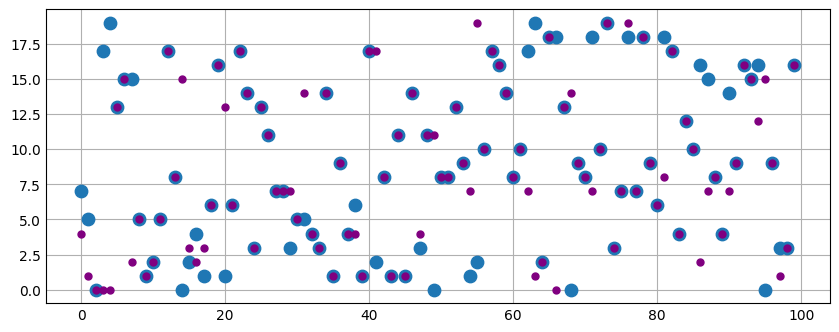

In [ ]:
news_test_y_predictions = nn_clf3.predict(news_test_x)
pl.figure(figsize=(8, 3))
pl.scatter(range(100), news_test_y[:100], s=80)
pl.scatter(range(100), news_test_y_predictions[:100], color='purple', s=25);

In [ ]:
# unsupervised
import sklearn.linear_model as slm
import sklearn.neural_network as snn
from sklearn.pipeline import Pipeline
x_scaled = lambda x: (x - np.min(x, 0)) / (np.max(x, 0) + .1**4)
logistic = slm.LogisticRegression(
    solver='liblinear', multi_class='ovr', max_iter=50, tol=.1**4, C=5000.)
brbm = snn.BernoulliRBM(random_state=0, verbose=False)
brbm.learning_rate, brbm.n_iter, brbm.n_components = .05, 50, 128
nn_clf2 = Pipeline(steps=[('brbm', brbm), ('logistic', logistic)])
nn_clf2.fit(x_scaled(digits_train_x), digits_train_y)

Pipeline(steps=[('brbm',
                 BernoulliRBM(learning_rate=0.05, n_components=128, n_iter=50,
                              random_state=0, verbose=False)),
                ('logistic',
                 LogisticRegression(C=5000.0, max_iter=50, multi_class='ovr',
                                    solver='liblinear',
                                    tol=0.00010000000000000002))])

In [ ]:
from sklearn.metrics import classification_report
print("Logistic regression using BRBM features:\n")
print(classification_report(
    digits_test_y,
    nn_clf2.predict(x_scaled(digits_test_x))))

Logistic regression using BRBM features:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.97      1.00      0.98        32
           2       1.00      0.95      0.97        38
           3       0.98      1.00      0.99        43
           4       1.00      0.95      0.97        39
           5       1.00      0.94      0.97        34
           6       1.00      0.97      0.98        29
           7       0.98      0.98      0.98        42
           8       0.91      1.00      0.96        32
           9       0.91      0.94      0.93        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



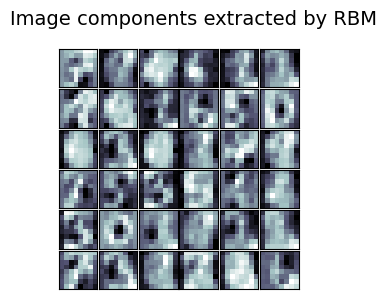

In [ ]:
pl.figure(figsize=(3, 3)); n = 6
for i, comp in enumerate(brbm.components_[:n**2]):
    pl.subplot(6, 6, i+1)
    pl.imshow(comp.reshape((8, 8)), cmap=pl.cm.bone, interpolation="nearest")
    pl.xticks(()); pl.yticks(())
pl.suptitle("Image components extracted by RBM", fontsize=14)
pl.subplots_adjust(.05, .05, .85, .85, .05, .05);